# 載入 cifar10 資料集

In [1]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 查看資料的 shape

In [2]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


# 查看標籤的 shape

In [3]:
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (50000, 1)
y_test shape: (10000, 1)


# 查看標籤的內容 

In [4]:
# 查看前10個訓練標籤
print(y_train[0: 10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


# 進行 min-max normalization

In [5]:
x_train_norm = x_train.astype('float32') / 255 #每個像素除與255
x_test_norm = x_test.astype('float32') / 255 #每個像素除與255
# min-max normalization後
print(x_train_norm[0][0][0])

[0.23137255 0.24313726 0.24705882]


# 將數字標籤進行 One-hot 編碼

In [6]:
from tensorflow.keras import utils

# 轉換前
print(y_train[0])

[6]


In [7]:
# 進行 One-hot 編碼轉換...
y_train_onehot = utils.to_categorical(y_train, 10) #將訓練標籤進行 One-hot 編碼
y_test_onehot = utils.to_categorical(y_test, 10) #將訓練標籤進行 One-hot 編碼

# 轉換後
print(y_train_onehot[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# 建立 CNN 神經網路架構

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [9]:
# CNN
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3))) #卷積層 (輸入)
cnn.add(Dropout(0.25)) #Dropout
cnn.add(MaxPooling2D((2, 2))) #池化層

cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu')) #卷積層
cnn.add(Dropout(0.25)) #Dropout層
cnn.add(MaxPooling2D((2, 2))) #池化層

cnn.add(Flatten()) #展平層
cnn.add(Dropout(0.25)) #Dropout
cnn.add(Dense(1024, activation='relu')) #密集層
cnn.add(Dropout(0.25)) #Dropout
cnn.add(Dense(10, activation='softmax')) #密集層 (輸出分類)

In [10]:
# 神經網路的訓練配置 #
cnn.compile(loss='categorical_crossentropy', #損失函數
           optimizer='adam', #adam優化器
           metrics=['acc']) #以準確度作為訓練指標

In [11]:
# 進行訓練 #
history = cnn.fit(x=x_train_norm, #訓練資料
                 y=y_train_onehot, #訓練標籤
                 batch_size=128, #每個批次用128筆資料進行訓練
                 epochs=20, #20個訓練週期(次數)
                 validation_split = 0.1, #拿出訓練資料的10%最為驗證資料
                 )

Epoch 1/20
352/352 [==============================] - 53s 150ms/step - loss: 1.4752 - acc: 0.4693 - val_loss: 1.2829 - val_acc: 0.5750
Epoch 2/20
352/352 [==============================] - 56s 158ms/step - loss: 1.1055 - acc: 0.6087 - val_loss: 1.0874 - val_acc: 0.6474
Epoch 3/20
352/352 [==============================] - 57s 162ms/step - loss: 0.9541 - acc: 0.6648 - val_loss: 0.9939 - val_acc: 0.6698
Epoch 4/20
352/352 [==============================] - 58s 165ms/step - loss: 0.8558 - acc: 0.6996 - val_loss: 0.9106 - val_acc: 0.7160
Epoch 5/20
352/352 [==============================] - 59s 167ms/step - loss: 0.7622 - acc: 0.7313 - val_loss: 0.8281 - val_acc: 0.7276
Epoch 6/20
352/352 [==============================] - 56s 159ms/step - loss: 0.6734 - acc: 0.7631 - val_loss: 0.7901 - val_acc: 0.7418
Epoch 7/20
352/352 [==============================] - 56s 160ms/step - loss: 0.6000 - acc: 0.7893 - val_loss: 0.7813 - val_acc: 0.7332
Epoch 8/20
352/352 [==============================] - 6

# 繪製圖表

In [12]:
import matplotlib.pyplot as plt
#建置繪圖函式
def show_train_history(train_history,train,validation,label):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(label)
    plt.xlabel('Epoch')#不同回合的變化
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

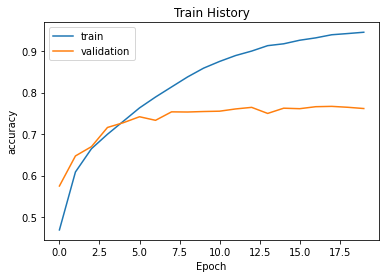

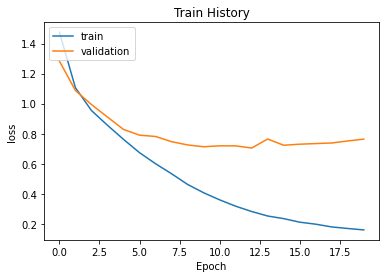

In [13]:
#顯示訓練結果
show_train_history(history,'acc','val_acc','accuracy')
show_train_history(history,'loss','val_loss','loss')

In [14]:
# --  儲存模型 -- #
cnn.save('CNN_Model.h5')

In [15]:
# -- 儲存模型權重-- #
cnn.save_weights('CNN_weights.h5')

In [16]:
# -- 載入模型 -- #
from tensorflow.keras.models import load_model

old_cnn = load_model('CNN_Model.h5')
print('載入模型成功')

載入模型成功


# 使用測試資料評估神經網路

In [17]:
# evaluate
test_loss, test_val = cnn.evaluate(x_test_norm, y_test_onehot)
print('測試資料損失值:', test_loss)
print('測試資料準確度:', test_val)

313/313 [==============================] - 3s 10ms/step - loss: 0.8051 - acc: 0.7418
測試資料損失值: 0.8051263093948364
測試資料準確度: 0.7418000102043152


In [18]:
# predict
predict_prop = cnn.predict(x_test_norm)
print('第一筆測試資料的預測機率', predict_prop[0])

第一筆測試資料的預測機率 [8.7064441e-04 1.0671535e-03 3.9973937e-04 9.1925246e-01 5.9640875e-05
 6.6816412e-02 3.6776285e-03 2.0767179e-04 7.1442151e-03 5.0451135e-04]


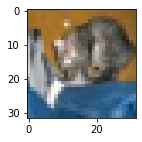

In [19]:
# -- 查看測試資料的第 1 張圖片 -- #
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(2, 2)
plt.imshow(x_test[0])
plt.show()

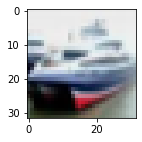

In [20]:
# -- 查看測試資料的第 2 張圖片 -- #
fig = plt.gcf()
fig.set_size_inches(2, 2)
plt.imshow(x_test[1])
plt.show()

In [21]:
# -- 直接預測數字標籤 -- #
predict_class = cnn.predict_classes(x_test_norm)
print('前 10 筆預測標籤:', predict_class[: 10])
print('前 10 筆原始標籤:', y_test[: 10].reshape(10))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
前 10 筆預測標籤: [3 8 8 0 6 6 1 6 3 1]
前 10 筆原始標籤: [3 8 8 0 6 6 1 6 3 1]
